# Trabajo Práctico 1
## Análisis Exploratorio

### Richter's Predictor: Modeling Earthquake Damage

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_types = {
    'height_percentage':'category',
    'land_surface_condition':'category',
    'foundation_type':'category',
    'roof_type':'category',
    'ground_floor_type':'category',
    'other_floor_type':'category',
    'position':'category',
    'plan_configuration':'category',
    'has_superstructure_adobe_mud':bool,
    'has_superstructure_mud_mortar_stone':bool,
    'has_superstructure_stone_flag':bool,
    'has_superstructure_cement_mortar_stone':bool,
    'has_superstructure_mud_mortar_brick':bool,
    'has_superstructure_cement_mortar_brick':bool,
    'has_superstructure_timber':bool,
    'has_superstructure_bamboo':bool,
    'has_superstructure_rc_non_engineered':bool,
    'has_superstructure_rc_engineered':bool,
    'has_superstructure_other':bool,
    'legal_ownership_status':'category',
    'count_families':'category',
    'has_secondary_use':bool,
    'has_secondary_use_agriculture':bool,
    'has_secondary_use_hotel':bool,
    'has_secondary_use_rental':bool,
    'has_secondary_use_institution':bool,
    'has_secondary_use_school':bool,
    'has_secondary_use_industry':bool,
    'has_secondary_use_health_post':bool,
    'has_secondary_use_gov_office':bool,
    'has_secondary_use_use_police':bool,
    'has_secondary_use_other':bool
    
}

In [3]:
labels = pd.read_csv("/home/mauricio/Documents/Datos/Tp1RichterPredictor/train_labels.csv",
                    dtype = {'damage_grade':'category'})
values = pd.read_csv("/home/mauricio/Documents/Datos/Tp1RichterPredictor/train_values.csv"\
                    ,dtype = data_types)

In [4]:
labels.head(5)

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [5]:
values.tail(5)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
260596,688636,25,1335,1621,1,55,6,3,n,r,...,False,False,False,False,False,False,False,False,False,False
260597,669485,17,715,2060,2,0,6,5,t,r,...,False,False,False,False,False,False,False,False,False,False
260598,602512,17,51,8163,3,55,6,7,t,r,...,False,False,False,False,False,False,False,False,False,False
260599,151409,26,39,1851,2,10,14,6,t,r,...,False,False,False,False,False,False,False,False,False,False
260600,747594,21,9,9101,3,10,7,6,n,r,...,False,False,False,False,False,False,False,False,False,False


In [6]:
#damage_grade entre 1 y 3
labels.damage_grade.describe()

count     260601
unique         3
top            2
freq      148259
Name: damage_grade, dtype: object

In [7]:
values.describe()
#promedio de pisos 2, máx cantidad de pisos 9
#edificios viejos, edad 995 años

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000


In [8]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   building_id   260601 non-null  int64   
 1   damage_grade  260601 non-null  category
dtypes: category(1), int64(1)
memory usage: 2.2 MB


In [9]:
values.shape
#veo que no hay datos nulos (nans)

(260601, 39)

In [10]:
#veo los tipos de datos y si conviene parsearlos
#había muchos datos binarios como int64
#también datos category que eran objects
values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int64   
 1   geo_level_1_id                          260601 non-null  int64   
 2   geo_level_2_id                          260601 non-null  int64   
 3   geo_level_3_id                          260601 non-null  int64   
 4   count_floors_pre_eq                     260601 non-null  int64   
 5   age                                     260601 non-null  int64   
 6   area_percentage                         260601 non-null  int64   
 7   height_percentage                       260601 non-null  category
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

In [11]:
values.land_surface_condition.drop_duplicates()

0    t
1    o
6    n
Name: land_surface_condition, dtype: category
Categories (3, object): ['n', 'o', 't']

In [12]:
values.foundation_type.drop_duplicates()

0     r
7     w
9     i
11    u
34    h
Name: foundation_type, dtype: category
Categories (5, object): ['h', 'i', 'r', 'u', 'w']

In [13]:
values.has_secondary_use_gov_office.drop_duplicates()

0        False
27243     True
Name: has_secondary_use_gov_office, dtype: bool

In [14]:
values.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [15]:
values.size

10163439

In [16]:
values.index

RangeIndex(start=0, stop=260601, step=1)

## Cantidad de Pisos por Edificio %

In [17]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [18]:
cant_pisos_por_ed = values.loc[:,["count_floors_pre_eq"]]\
.value_counts(normalize=True)


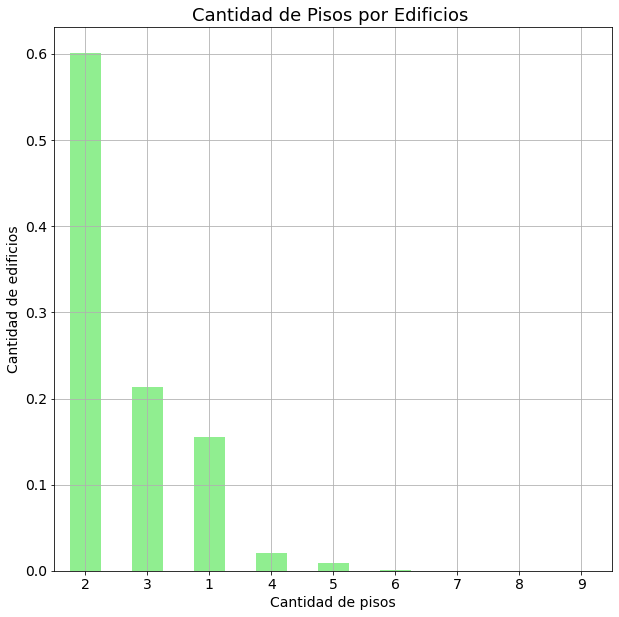

In [26]:
ax = cant_pisos_por_ed.plot.bar(color='lightgreen',rot=0,figsize=(10,10),grid=True,fontsize=14)
ax.set_ylabel('Cantidad de edificios',fontsize=14)
ax.set_xlabel('Cantidad de pisos',fontsize=14)
ax.set_title('Cantidad de Pisos por Edificios ',fontsize=18)
#ax.set_facecolor("lightblue")

#bar_labels = highest_buildings.values
x_labels = values.count_floors_pre_eq.drop_duplicates().values
ax.set_xticklabels(x_labels)

plt.show()

## Daño según Cantidad de Pisos


In [20]:
daño_cant_pisos = values.loc[:,["building_id","count_floors_pre_eq"]]\
.merge(labels,on="building_id",how='inner')\
.loc[:,["damage_grade","count_floors_pre_eq"]]
#daño_cant_pisos = pd.pivot_table(daño_cant_pisos,index="count_floors_pre_eq",columns="damage_grade",aggfunc='count')
daño_cant_pisos['aux'] = 1
daño_cant_pisos = daño_cant_pisos.pivot_table(index='count_floors_pre_eq'\
                        ,columns='damage_grade',values='aux',aggfunc='count')
daño_cant_pisos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 1 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       9 non-null      int64
 1   2       9 non-null      int64
 2   3       9 non-null      int64
dtypes: int64(3)
memory usage: 288.0 bytes


## Tipo de Daño segun Cantidad de Pisos

# twilight_r,mako,blues,greens

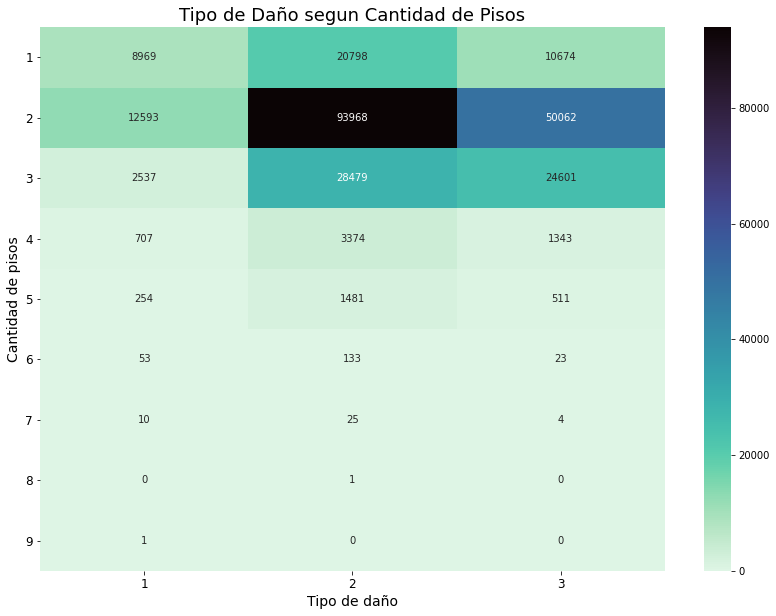

In [27]:
fig, ax = plt.subplots(figsize=(14,10)) 
p1 = sns.heatmap(daño_cant_pisos,annot=True,cmap='mako_r',fmt='d')
#annot true por defecto pone el formato en cientifico
ax.set_ylabel('Cantidad de pisos',fontsize=14)
ax.set_xlabel('Tipo de daño',fontsize=14)
ax.set_title('Tipo de Daño segun Cantidad de Pisos',fontsize=18)

y_labels = daño_cant_pisos.index
x_labels = daño_cant_pisos.columns
aux = ax.set_yticklabels(y_labels,rotation=0,fontsize=12)
aux = ax.set_xticklabels(x_labels,fontsize=12)